In [1]:
!pip install keras-facenet


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
width = 224
length  =224
batch_size = 64
epoch = 15
fill_mode_names = ['nearest' , 'wrap','reflect' ]

In [4]:
train_deg = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.25,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode=fill_mode_names[0],
    rescale=1./255.,
)
train_dir="dataset/Train"
train_data = train_deg.flow_from_directory(
    directory=train_dir,
    target_size=(width ,length) ,
    class_mode='categorical' ,
    batch_size=batch_size ,
    shuffle=True,
    
)


Found 2190 images belonging to 31 classes.


In [5]:
classes=list(train_data.class_indices.keys())
classes

['Akshay Kumar',
 'Alexandra Daddario',
 'Alia Bhatt',
 'Amitabh Bachchan',
 'Andy Samberg',
 'Anushka Sharma',
 'Billie Eilish',
 'Brad Pitt',
 'Camila Cabello',
 'Charlize Theron',
 'Claire Holt',
 'Courtney Cox',
 'Dwayne Johnson',
 'Elizabeth Olsen',
 'Ellen Degeneres',
 'Henry Cavill',
 'Hrithik Roshan',
 'Hugh Jackman',
 'Jessica Alba',
 'Kashyap',
 'Lisa Kudrow',
 'Margot Robbie',
 'Marmik',
 'Natalie Portman',
 'Priyanka Chopra',
 'Robert Downey Jr',
 'Roger Federer',
 'Tom Cruise',
 'Vijay Deverakonda',
 'Virat Kohli',
 'Zac Efron']

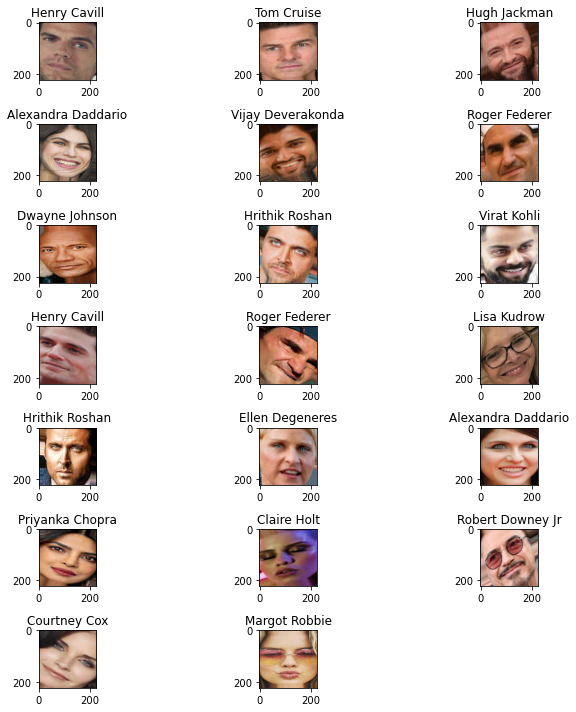

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(0, 20):
    plt.subplot(7, 3, i+1)
    for X_batch, Y_batch in train_data:
        image = X_batch[0]
        plt.title(classes[np.argmax(Y_batch[0])])
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [7]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dropout , Dense , GlobalAveragePooling2D ,BatchNormalization,Flatten
from keras.optimizers import Adam

input_shape = (width, length, 3)
num_classes = len(classes)
print(num_classes) 

31


In [8]:
vgg16_model = VGG16(weights='imagenet' , include_top = False , input_shape= input_shape)
for layer in vgg16_model.layers:
     layer.trainable = False
        
x = vgg16_model.output

x = Flatten()(x)
predictions = Dense(31 , activation='softmax')(x)
# Create the model
model = Model(inputs=vgg16_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam' , loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# Train the model
from keras.callbacks import EarlyStopping , LearningRateScheduler
# Learning rate scheduler
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 15:
        return 0.0001
    else:
        return 0.0001

# Create a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)


callback = [lr_scheduler]


In [10]:
history = model.fit(train_data,
                  batch_size=batch_size,
                  epochs=epoch,
                  callbacks=callback ,
                  shuffle=True ,
                 )

Epoch 1/15
35/35 [==============================] - 46s 823ms/step - loss: 3.1015 - accuracy: 0.2616 - lr: 0.0010
Epoch 2/15
35/35 [==============================] - 29s 828ms/step - loss: 1.4531 - accuracy: 0.5881 - lr: 0.0010
Epoch 3/15
35/35 [==============================] - 23s 646ms/step - loss: 1.0794 - accuracy: 0.6918 - lr: 0.0010
Epoch 4/15
35/35 [==============================] - 22s 617ms/step - loss: 0.8021 - accuracy: 0.7726 - lr: 0.0010
Epoch 5/15
35/35 [==============================] - 23s 657ms/step - loss: 0.6390 - accuracy: 0.8178 - lr: 0.0010
Epoch 6/15
35/35 [==============================] - 23s 640ms/step - loss: 0.5237 - accuracy: 0.8580 - lr: 0.0010
Epoch 7/15
35/35 [==============================] - 22s 622ms/step - loss: 0.4485 - accuracy: 0.8753 - lr: 0.0010
Epoch 8/15
35/35 [==============================] - 22s 610ms/step - loss: 0.4542 - accuracy: 0.8749 - lr: 0.0010
Epoch 9/15
35/35 [==============================] - 22s 619ms/step - loss: 0.3523 - accu

In [11]:
valid_dir = "dataset/Test"





valid_deg = ImageDataGenerator(rescale=1./255.)
#############
valid_data = valid_deg.flow_from_directory(valid_dir,target_size=(width, length),batch_size=batch_size,
                                        class_mode='categorical',
                                         shuffle=True,
                                        )

model.evaluate(valid_data)

Found 372 images belonging to 31 classes.
6/6 [==============================] - 16s 3s/step - loss: 0.4928 - accuracy: 0.8629


[0.4927648603916168, 0.8629032373428345]

1/1 [==============================] - 2s 2s/step
Actual:Alexandra Daddario


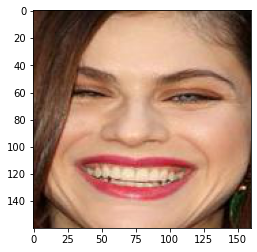

Predicted:  Alexandra Daddario


In [12]:
from PIL import Image as image1
from skimage import transform
img= "dataset/Test/Alexandra Daddario/Alexandra Daddario_0.jpg" 
img = image1.open(img) 
np_img = np.array(img).astype('float32')/255
np_img = transform.resize(np_img , (224,224,3))
np_img = np.expand_dims(np_img, axis=0)
y_pred = model.predict(np_img) 
print("Actual:Alexandra Daddario")
plt.imshow(img) 
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])


1/1 [==============================] - 0s 21ms/step
Actual:Tom 


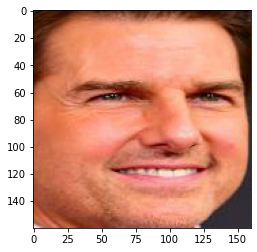

Predicted:  Tom Cruise


In [13]:
img= "dataset/Test/Tom Cruise/Tom Cruise_0.jpg" 
img = image1.open(img) 
np_img = np.array(img).astype('float32')/255
np_img = transform.resize(np_img , (224,224,3))
np_img = np.expand_dims(np_img, axis=0)
y_pred = model.predict(np_img) 
print("Actual:Tom Cruise ")
plt.imshow(img) 
plt.show()
print("Predicted: ",classes[np.argmax(y_pred)])